In [ ]:
#|default_exp datasets

In [ ]:
#|export
from __future__ import annotations
import math,numpy as np,matplotlib.pyplot as plt
from operator import itemgetter
from itertools import zip_longest
import fastcore.all as fc
from torch.utils.data import default_collate,DataLoader
from miniai.training import *
import torchvision.transforms.functional as TF

In [ ]:
from datasets import load_dataset
import torch

%matplotlib inline

### Hugging Face dataset

In [ ]:
name = 'fashion_mnist'

In [ ]:
#|export
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

In [ ]:
rds = load_dataset(name)

Found cached dataset fashion_mnist (/Users/arun/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
x,y = rds['train'].features

In [ ]:
@inplace
def transformi(b):
    b[x] = [torch.flatten(TF.to_tensor(ele)) for ele in b[x]]

In [ ]:
tds = rds.with_transform(transformi)

In [ ]:
#|export
def collated_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b):
        return get(default_collate(b))
    return _f

In [ ]:
dlf = DataLoader(tds['train'], batch_size=4, collate_fn=collated_dict(tds['train']))

### Plotting images

In [ ]:
#|export
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, title=None, figsize=None, noframe=True, **kwargs):
    if fc.hasattrs(im, ('cpu', 'permute', 'detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0] < 5:
            im = im.permute(1,2,0)
    elif not isinstance(im, np.ndarray):
        im = np.array(im)
    if im.shape[-1] == 1:
        im = im[..., 0]
    if ax is None:
        _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    if noframe:
        ax.axis('off')
    if title is not None:
        ax.set_title(title)
    return ax

In [ ]:
xb,yb = next(iter(dlf))
xb.shape,yb.shape

(torch.Size([4, 784]), torch.Size([4]))

In [ ]:
im = xb[0].view(1, 28, 28)
if len(im.shape)==3 and im.shape[0] < 5:
    im = im.permute(1,2,0)
im.shape

torch.Size([28, 28, 1])

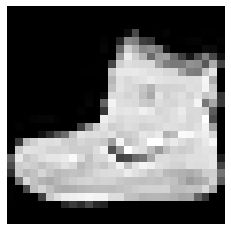

In [ ]:
show_image(im, cmap='gray');

In [ ]:
#|export
@fc.delegates(plt.subplots, keep=True)
def subplots(
    nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure
    **kwargs
): # fig and axs
    "A figure and set of subplots to display images of `imsize` inches"
    if figsize is None: figsize=(ncols*imsize, nrows*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None: fig.suptitle(suptitle)
    if nrows*ncols==1: ax = np.array([ax])
    return fig,ax
     